## Setup

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from datetime import datetime, timedelta
from pandas.tseries.holiday import USFederalHolidayCalendar
from dateutil.relativedelta import relativedelta
import requests
import json
from scipy import stats as s
drive.mount('/content/drive')
data_main = pd.read_csv('/content/drive/My Drive/Coffee_Stores_Data.csv')
namesMainData = data_main['Description'].unique()
storeCount = len(data_main['StoreID'].unique())

print(namesMainData)

#data_main.head

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Caprese Sandwich' 'Honey Raisin Bran Muffin'
 'Pressed Juicery Spicy Greens w Ginger' 'Vive Juice Shot'
 'Mixed Berries & Granola Yogurt Parfait'
 'Breakfast Burrito Egg Beans & Rice' 'Jalapeno Cheese Bagel'
 'Everything Bagel' 'Plain Bagel' 'Blueberry Scone' 'Butter Croissant'
 'Chocolate Croissant' 'Cinnamon Roll' 'Cookie - Chocolate Chunk'
 'Tasty Tuna Salad Sandwich' 'Smoked Salmon Sandwich'
 'New York Cheesecake' 'Egg| Spinach & Cheddar Sandwich on Ciabatta'
 'Protein Box' 'Mixed Fruit Snack Pot' 'Danish - Classic Cheese'
 'Croissant - White Cheddar Jalapeno' 'Muffin - Blueberry Streusel'
 'Muffin - Double Chocolate' 'Coffee Cake with Streusel' 'Lemon Loaf'
 'Almond Croissant' 'Pretzel Egg Mozzarella Sandwich'
 'Egg White Pesto Wrap' 'Overnight Oats' 'Caramel Cake Pop' nan]


In [ ]:
data_main['CategoryLvl1Desc'].unique()

#here we created the shortened csv file with only our data

to_remove = ['Caramel Cake Pop', 'Overnight Oats', 'Egg White Pesto Wrap', 'Pressed Juicery Spicy Greens w Ginger']
data_main.drop(data_main[data_main['Description'].isin(to_remove)].index, inplace = True)
unique_products =  data_main['Description'].unique()
our_products = unique_products[ : 13]
new_local_data = data_main[data_main['Description'].isin(our_products)]
new_local_data.shape
new_local_data.to_csv('corporate_data_group2.csv')


'''
Data Cleaning 
'''
# checking for any null values in the df
data_main[data_main.isnull().any(axis=1)]
# there appears to only be NaN values in the Missed Sales Column
# replace all of the NaNs in missed sales with the value 0 
data_main['MissedSales'] = data_main['MissedSales'].fillna(0.0)

data_main.isnull().values.any()

 # might want to change this later just to be an average






True

In [ ]:
data_main.drop('GroupID', axis=1, inplace=True)

In [ ]:
data_main.isnull().values.any()

True

In [ ]:
data_main.to_csv('corporate_data_group2.csv', index=False)

## 1. Provide the box plots and statistics of 27 products, inventory patterns, stock out patterns and missed sales (note: do not rely on the missed sales data in the data set. See part 4 below for more information). 

Product:  Caprese Sandwich


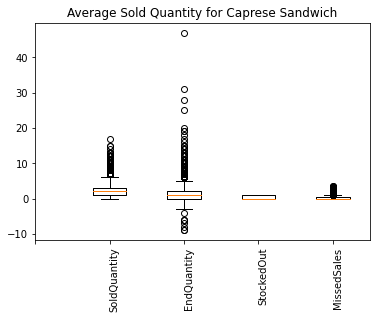

Product:  Breakfast Burrito Egg Beans & Rice


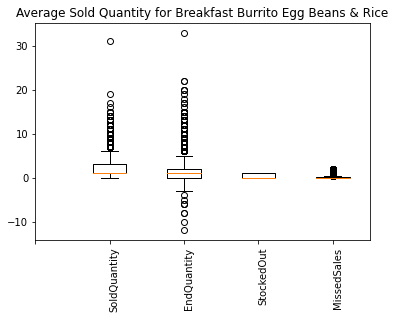

Product:  Everything Bagel


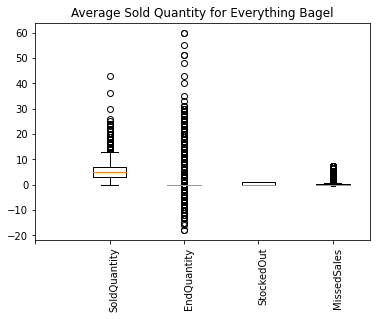

Product:  Blueberry Scone


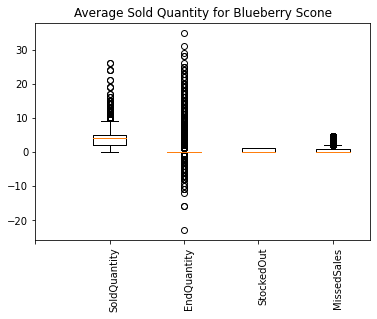

Product:  Butter Croissant


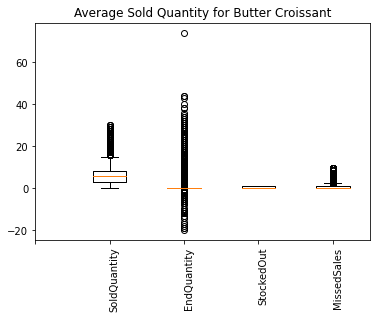

Product:  Chocolate Croissant


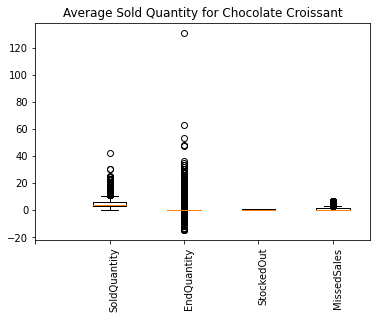

Product:  Cinnamon Roll


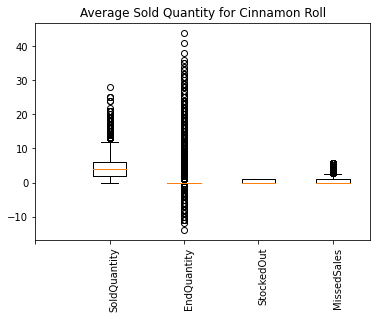

Product:  Cookie - Chocolate Chunk


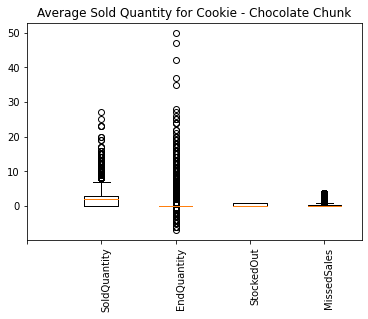

Product:  Egg| Spinach & Cheddar Sandwich on Ciabatta


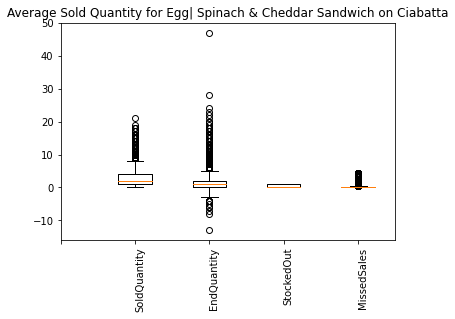

Product:  Danish - Classic Cheese


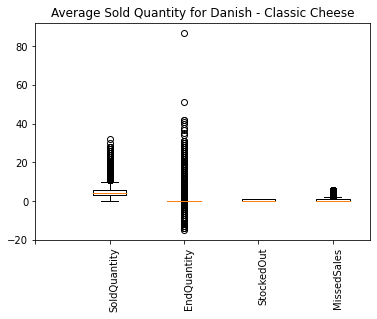

Product:  Croissant - White Cheddar Jalapeno


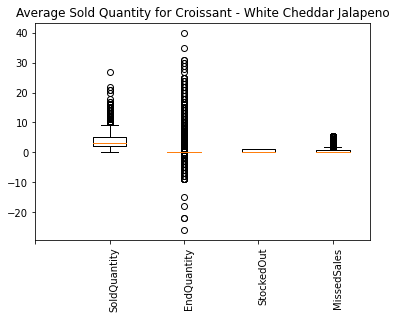

Product:  Coffee Cake with Streusel


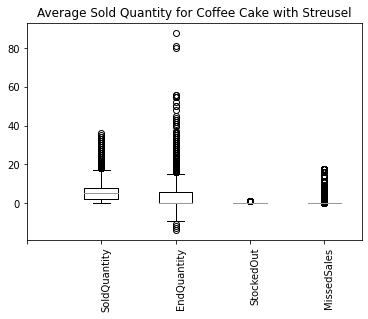

Product:  Almond Croissant


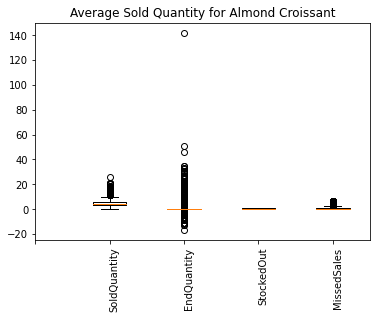

In [ ]:

for name in namesMainData:
  print("Product: " , name)
  plt.title("Average Sold Quantity for " + name)
  data = [data_main.loc[data_main['Description'] == name]['SoldQuantity'], data_main.loc[data_main['Description'] == name]['EndQuantity'], data_main.loc[data_main['Description'] == name]['StockedOut'], data_main.loc[data_main['Description'] == name]['MissedSales']]

  plt.boxplot(data)
  bars = (' ', 'SoldQuantity', 'EndQuantity', 'StockedOut', 'MissedSales' )
  y_pos = np.arange(len(bars) )
  plt.xticks(y_pos, bars, fontsize='10' , rotation=90, horizontalalignment='left')
  plt.show()


## 2.	Show graphs of best seller and worst seller products of top 25% and bottom 25% and provide your insight into data. (The average selling price of a product is 3$). Go beyond graphs and just analyzing data. Think about “So What” when writing your report!

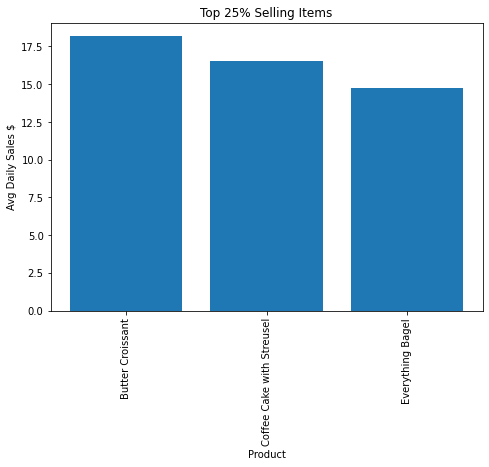

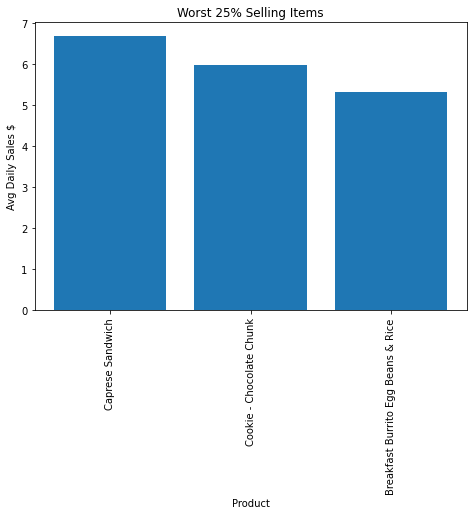

In [ ]:
averageSold = []
for name in namesMainData:
  averageSold.append([name, data_main.loc[data_main['Description'] == name]['SoldQuantity'].mean() * 3])
for n in range(len(averageSold)-1, 0, -1):
  for i in range(n):
    if averageSold[i][1] < averageSold[i + 1][1]:
      averageSold[i], averageSold[i + 1] = averageSold[i + 1], averageSold[i]

topTwentyFive = round((len(averageSold)/4))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sales = []
products = []
plt.title("Top 25% Selling Items")
plt.xlabel('Product')
plt.ylabel('Avg Daily Sales $')
for i in range(0, topTwentyFive):
  sales.append(averageSold[i][1])
  products.append(averageSold[i][0])

ax.bar(products,sales)
plt.xticks(fontsize='10' , rotation=90)
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sales = []
products = []
plt.title("Worst 25% Selling Items")
plt.xlabel('Product')
plt.ylabel('Avg Daily Sales $')
for i in range(len(averageSold) - topTwentyFive, len(averageSold)):
  sales.append(averageSold[i][1])
  products.append(averageSold[i][0])

ax.bar(products,sales)
plt.xticks(fontsize='10' , rotation=90)
plt.show()

## 3.	Show graphs of best and worst products based on their inventory management - Top 25% and bottom 25% and provide your insight into data (the average cost of a product is 0.5$) Identify where/when the store gets rid of the unpurchased products. Go beyond graphs and just analyzing data. Think about “So What” when writing your report!

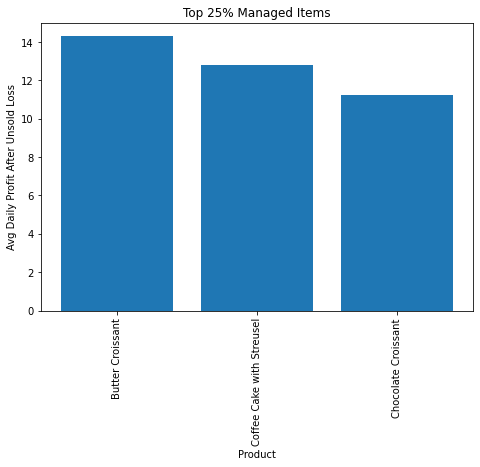

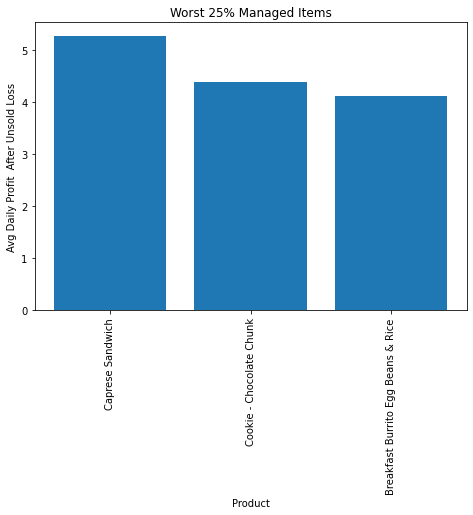

In [ ]:
averageSold = []
for name in namesMainData:
  averageSold.append([name,  (data_main.loc[data_main['Description'] == name]['SoldQuantity'].mean() * 3 - data_main.loc[data_main['Description'] == name]['ReceivedQuantity'].mean() * .5)])


for n in range(len(averageSold)-1, 0, -1):
  for i in range(n):
    if averageSold[i][1] < averageSold[i + 1][1]:
      averageSold[i], averageSold[i + 1] = averageSold[i + 1], averageSold[i]

topTwentyFive = round((len(averageSold)/4))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sales = []
products = []
plt.title("Top 25% Managed Items")
plt.xlabel('Product')
plt.ylabel('Avg Daily Profit After Unsold Loss')
for i in range(0, topTwentyFive):
  sales.append(averageSold[i][1])
  products.append(averageSold[i][0])

ax.bar(products,sales)
plt.xticks(fontsize='10' , rotation=90)
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sales = []
products = []
plt.title("Worst 25% Managed Items")
plt.xlabel('Product')
plt.ylabel('Avg Daily Profit  After Unsold Loss')
for i in range(len(averageSold) - topTwentyFive, len(averageSold)):
  sales.append(averageSold[i][1])
  products.append(averageSold[i][0])

ax.bar(products,sales)
plt.xticks(fontsize='10' , rotation=90)
plt.show()

Looking at the data from the section below it is clear that the products like the Breakfast Burrito and the Caprese sandwich are overordered during the weekends leading to more waste. The Chocolate Chunk coodie on the other hand is also loosing a lot becuase it is a less healthy item and suffers less sales, and is benifitng more for sales on the weekends but is overstocked on the weekdays which are more prevelant and cause wider loss. 

## 4.	Identify stock outs and estimate the loss of sales per year per product. Assume when we are out of stock, we conservatively lose 75% of the average of sales in the previous 4 weeks on the same weekday. You are welcome to make other reasonable assumptions. Clearly explain your assumption.

The assumation we are makig is if we do not find the past day sale data data the average sale is 3.89

In [ ]:
averageStockout = []
for name in namesMainData:
  totalLoss = 0

  for date in data_main.loc[data_main['Description'] == name]['BusinessDate'].unique():
    sdate = datetime(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])) 

    days = [sdate - timedelta(days=7),  sdate - timedelta(days=14), sdate - timedelta(days=21), sdate - timedelta(days=28)]
    totalSaleAmount = 0
    daysFound = 0
    for newDate in days:
        thisMonth = str(newDate.month)
        thisDay = str(newDate.day)

        if(len(thisMonth) == 1):
          thisMonth = "0" + str(newDate.month)
        if(len(thisDay) == 1):
          thisDay = "0" + str(newDate.day)
        currentDate = str(newDate.year) + "-" +  str(thisMonth) + "-" + str(thisDay)
        if(data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == currentDate)]['SoldQuantity'].empty == False):
          totalSaleAmount += data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == currentDate)]['SoldQuantity'].sum()
        else:
          totalSaleAmount += 3.89829718958646 * storeCount

    data_main.loc[(data_main['Description'] == name)  & (data_main['BusinessDate'] == date)]['SoldQuantity'].mean()
    
    
    totalLoss += round((((totalSaleAmount/4) * .75) * 3.0) * data_main.loc[(data_main['Description'] == name)  & (data_main['BusinessDate'] == date)]['StockedOut'].mean(), 2)


  averageStockout.append([name, totalLoss])


In [ ]:
for i in averageStockout:
  print(i[0], ": $", i[1])


Caprese Sandwich : $ 1286.4000000000005
Honey Raisin Bran Muffin : $ 3919.9199999999996
Pressed Juicery Spicy Greens w Ginger : $ 0
Vive Juice Shot : $ 52.63999999999999
Mixed Berries & Granola Yogurt Parfait : $ 688.1100000000001
Breakfast Burrito Egg Beans & Rice : $ 983.0500000000004
Jalapeno Cheese Bagel : $ 5054.860000000004
Everything Bagel : $ 5048.629999999997
Plain Bagel : $ 5899.329999999996
Blueberry Scone : $ 6150.400000000006
Butter Croissant : $ 7041.779999999996
Chocolate Croissant : $ 7044.749999999995
Cinnamon Roll : $ 6058.009999999998
Cookie - Chocolate Chunk : $ 1345.2199999999991
Tasty Tuna Salad Sandwich : $ 922.78
Smoked Salmon Sandwich : $ 738.8599999999997
New York Cheesecake : $ 29.15
Egg| Spinach & Cheddar Sandwich on Ciabatta : $ 1117.9399999999998
Protein Box : $ 1147.2699999999995
Mixed Fruit Snack Pot : $ 849.7499999999998
Danish - Classic Cheese : $ 5272.279999999995
Croissant - White Cheddar Jalapeno : $ 3646.720000000001
Muffin - Blueberry Streusel : $

## 5.	Show graphically how the product sales and inventory waste change. Investigate  

  a.	Impact of day of the week on sales and stocks (7 days)


In [ ]:
dailySalesStock = []
for name in namesMainData:
  dayStocks = [0,0,0,0,0,0,0]
  daySales = [0,0,0,0,0,0,0]
  for date in data_main.loc[data_main['Description'] == name]['BusinessDate'].unique():
    sdate = datetime(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])) 
    dayStocks[sdate.weekday()] = (dayStocks[sdate.weekday()] + data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == date)]['SoldQuantity'].mean() + data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == date)]['EndQuantity'].mean())/2
    daySales[sdate.weekday()] = (daySales[sdate.weekday()] + data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == date)]['SoldQuantity'].mean())/2
  dailySalesStock.append([name, dayStocks, daySales])   


['Caprese Sandwich', [3.245723429900984, 2.8318943144394364, 3.205627182264795, 3.6565656785900242, 3.7912484180148374, 3.365861246101286, 3.1751307136640246], [1.7086580628074186, 1.5672635040534728, 1.7173105157500894, 1.973852293374017, 2.1660905530654952, 1.739938088978373, 1.3894781386335542]]
['Breakfast Burrito Egg Beans & Rice', [3.0231582069177887, 2.8365905811029313, 3.3256863283129956, 3.8536753034136604, 4.019405288932389, 3.673202117818497, 3.371020725387389], [1.705887755202447, 1.4542839239232879, 1.695456304050728, 1.8956456586278871, 2.120513203846661, 1.858438077065915, 1.5678323206033435]]
['Everything Bagel', [8.800549514932108, 7.939367923387264, 8.152112599516363, 8.545019856544116, 8.612355487883093, 8.148276640405365, 7.789956562767664], [3.7647294891959957, 3.7880944764729754, 3.804297108343773, 3.9677796484858368, 4.239109108745923, 3.685741892295386, 3.237853860253069]]
['Blueberry Scone', [6.75035972287842, 5.472358515136383, 6.1706827393002115, 6.9848169915

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


['Almond Croissant', [8.51628803228615, 7.001251440701448, 7.601437678858072, 8.697759578605362, 9.221392552988128, 9.279701361356533, 8.706630186917932], [3.4464698309322843, 3.739318684401691, 3.8150651646563913, 4.1533428535418775, 4.492173849415724, 4.454583481807667, 3.7971117288134133]]


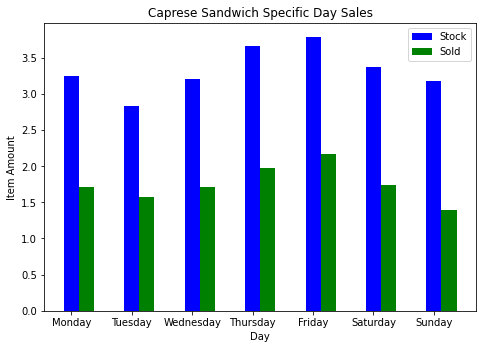

<Figure size 432x288 with 0 Axes>

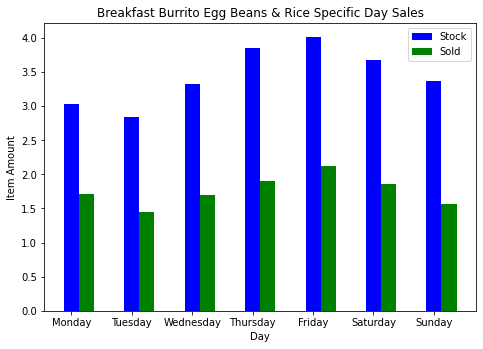

<Figure size 432x288 with 0 Axes>

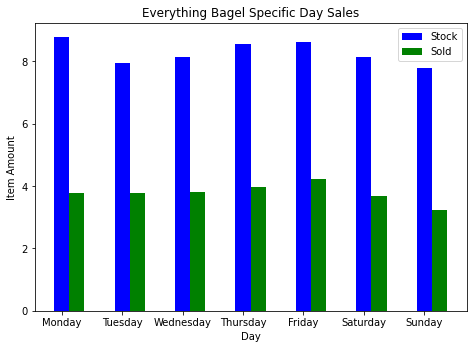

<Figure size 432x288 with 0 Axes>

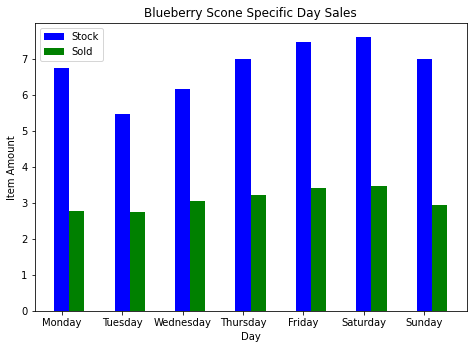

<Figure size 432x288 with 0 Axes>

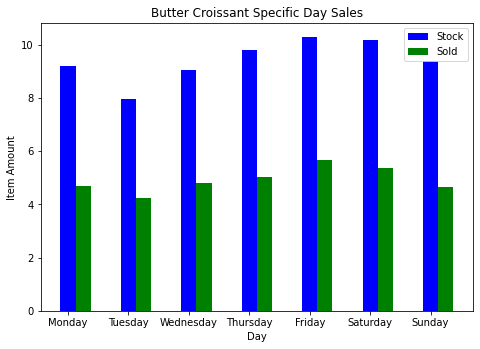

<Figure size 432x288 with 0 Axes>

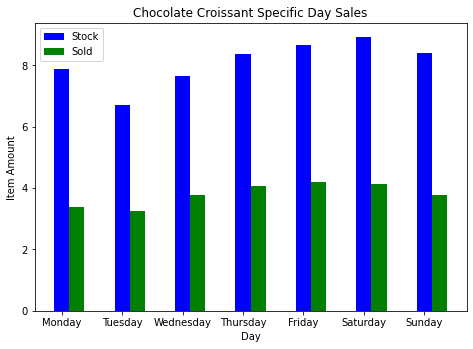

<Figure size 432x288 with 0 Axes>

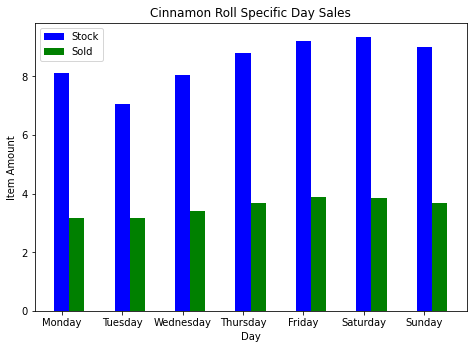

<Figure size 432x288 with 0 Axes>

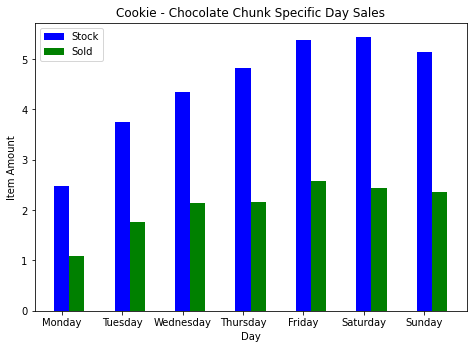

<Figure size 432x288 with 0 Axes>

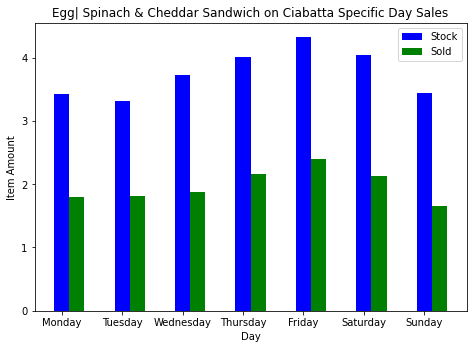

<Figure size 432x288 with 0 Axes>

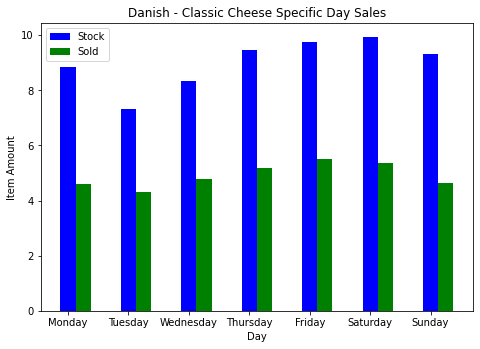

<Figure size 432x288 with 0 Axes>

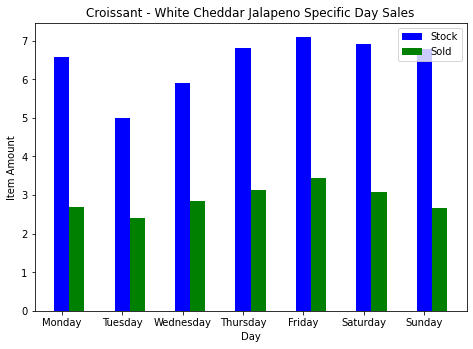

<Figure size 432x288 with 0 Axes>

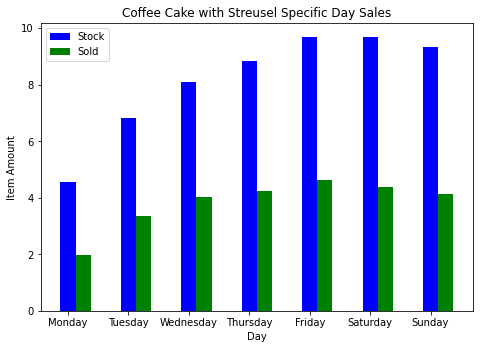

<Figure size 432x288 with 0 Axes>

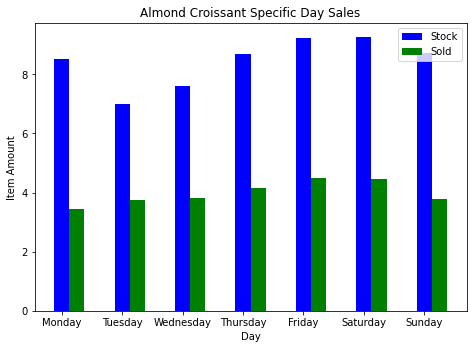

<Figure size 432x288 with 0 Axes>

In [ ]:
for item in dailySalesStock:
  print(item)
  data = [item[1], item[2]]
  X = np.arange(7)
  fig = plt.figure()

  ax = fig.add_axes([0,0,2,2])
  ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
  ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
  ax.legend(labels=['Stock', 'Sold'])
  plt.xticks(X, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))

  plt.title(item[0] +" Specific Day Sales")
  plt.xlabel('Day')
  plt.ylabel('Item Amount')
  fig = plt.figure()





Looking at the data the Coffee Cake is overstocked on Friday, Saturday and Sunday since they order more but do not sell more than they do on Wednesday and Thursday. Cinnamon roll is overstocked on all days but tuesday so they would need to limit the ordering of it since the sales are flat but the ordering patterns vary hevily and they become overstock on the weekends and monday. 

  b.	Monthly changes and patterns (for the duration of the data)


In [ ]:
itemmonths = []

for date in data_main['BusinessDate'].unique():
    year = date.split('-')[0]
    month =  date.split('-')[1]
    
    if([month, year] not in itemmonths):
      itemmonths.append([month, year])

monthlyStockData = []
for name in namesMainData:
  monthlyData = []
  for month in itemmonths:
    thisMonthSales = 0
    thisMonthStocks = 0
    sdate = datetime(int(month[1]), int(month[0]), 1) 
    edate = sdate + relativedelta(months=1)
    delta = edate - sdate   # returns timedelta
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        thisMonth = str(day.month)
        thisDay = str(day.day)

        if(len(thisMonth) == 1):
          thisMonth = "0" + str(day.month)
        if(len(thisDay) == 1):
          thisDay = "0" + str(day.day)
        currentDate = str(day.year) + "-" +  str(thisMonth) + "-" + str(thisDay)
        if(data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == currentDate)]['SoldQuantity'].empty == False):

          thisMonthStocks += (dayStocks[sdate.weekday()] + data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == currentDate)]['SoldQuantity'].mean() + data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == currentDate)]['EndQuantity'].mean())/2
          thisMonthSales += (daySales[sdate.weekday()] + data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == currentDate)]['SoldQuantity'].mean())/2
    monthlyData.append([month, thisMonthStocks, thisMonthSales])
  monthlyStockData.append([name, monthlyData])


AttributeError: ignored

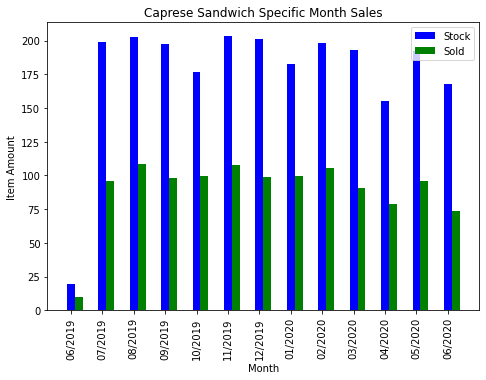

<Figure size 432x288 with 0 Axes>

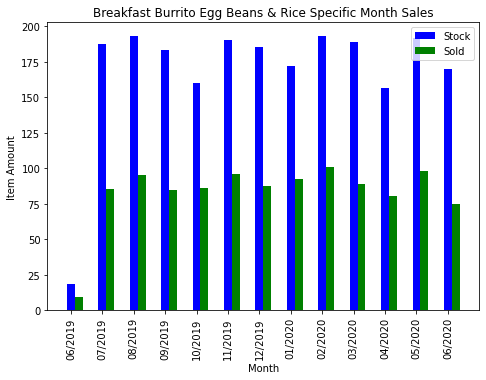

<Figure size 432x288 with 0 Axes>

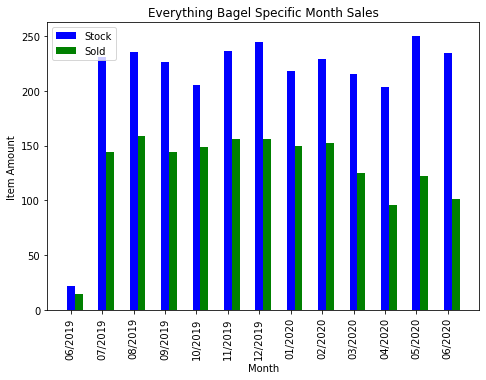

<Figure size 432x288 with 0 Axes>

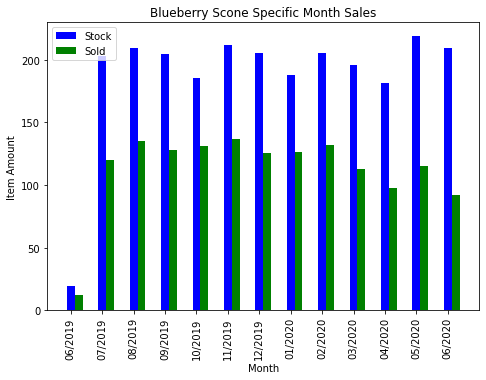

<Figure size 432x288 with 0 Axes>

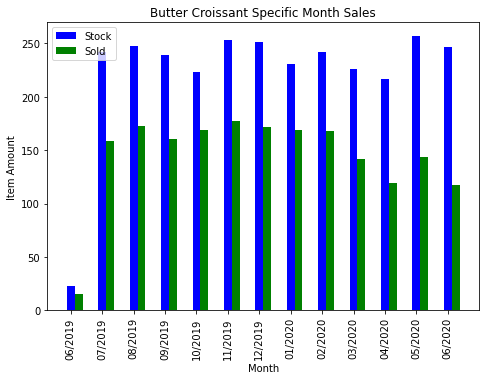

<Figure size 432x288 with 0 Axes>

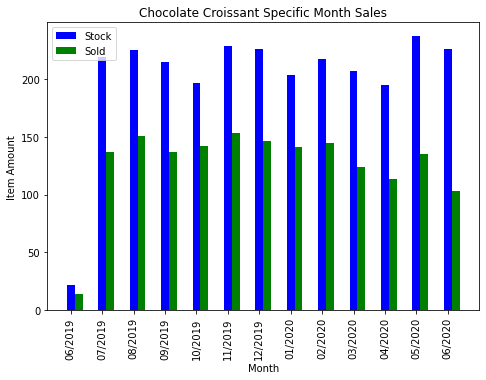

<Figure size 432x288 with 0 Axes>

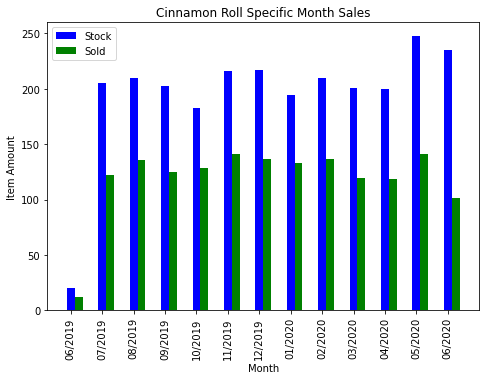

<Figure size 432x288 with 0 Axes>

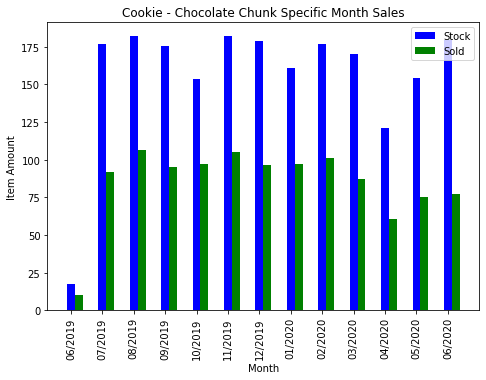

<Figure size 432x288 with 0 Axes>

In [ ]:

for item in monthlyStockData:
  datas1 = []
  datas2 = []
  for i in item[1]:
    datas1.append(i[1])
    datas2.append(i[2])
  data = [datas1, datas2]
  X = np.arange(len(datas2))
  fig = plt.figure()

  ax = fig.add_axes([0,0,1,1])
  ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
  ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
  ax.legend(labels=['Stock', 'Sold'])
  axisTicks = ()
  for i in item[1]:
    titleDate = i[0][0] + "/" + i[0][1]
    axisTicks = axisTicks + (titleDate,)

  plt.xticks(X, (axisTicks))

  plt.title(item[0] +" Specific Month Sales")
  plt.xlabel('Month')
  plt.ylabel('Item Amount')
  plt.xticks(fontsize='10' , rotation=90)

  fig = plt.figure()

  c.	Impact of weather condition based on two factors:

In [ ]:
#@title
tempuratureEffects = []


for name in namesMainData:

  itemDates = data_main[data_main['Description'] == name]['BusinessDate'].unique()
  avgTemps = []
  stocks = []
  sales = []
  for date in itemDates:
    try:
      day = date.split('-')[2]
      year = date.split('-')[0]
      month = date.split('-')[1]

      Token = 'AXeoJvASrMjbVSZHDNQtnjKhfSvIUlvC'
      station_id = 'GHCND:USW00023129'
          
      #make the api call
      r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&location=FIPS:US&startdate='+year+'-'+month+'-'+day+'&enddate='+year+'-'+month+'-'+day+'', headers={'token':Token})
      #load the api response as a json
      d = json.loads(r.text)
      #get all items in the response which are average temperature readings
      avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
      temps = []
      temps += [item['value'] for item in avg_temps]
      usAverageTemp = rtound((sum(emps) / len(temps))/10.0*1.8 + 32)

      if(usAverageTemp in avgTemps):
        stocks[avgTemps.index(usAverageTemp)] = (stocks[avgTemps.index(usAverageTemp)] + data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == date)]['SoldQuantity'].mean() + data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == date)]['EndQuantity'].mean())/2

        sales[avgTemps.index(usAverageTemp)] = (sales[avgTemps.index(usAverageTemp)] + data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == date)]['SoldQuantity'].mean())/2
      else:
        avgTemps.append(usAverageTemp)
        sales.append(data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == date)]['SoldQuantity'].mean())
        stocks.append(data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == date)]['SoldQuantity'].mean() + data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == date)]['EndQuantity'].mean())
    except:
      dateerror = ''
  tempuratureEffects.append([name, avgTemps, sales, stocks])


In [ ]:
import numpy as np
data_main["US_avg_tmp"] = np.nan
for date in data_main["BusinessDate"].unique():
    day = date.split('-')[2]
    year = date.split('-')[0]
    month = date.split('-')[1]

    Token = 'AXeoJvASrMjbVSZHDNQtnjKhfSvIUlvC'
    station_id = 'GHCND:USW00023129'
        
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&location=FIPS:US&startdate='+year+'-'+month+'-'+day+'&enddate='+year+'-'+month+'-'+day+'', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are average temperature readings
    avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
    temps = []
    temps += [item['value'] for item in avg_temps]
    usAverageTemp = round((sum(temps) / len(temps))/10.0*1.8 + 32)
    data_main.loc[(data_main.BusinessDate == date) , "US_avg_tmp"] = usAverageTemp
    print(date, usAverageTemp)
data_main.head()

2019-06-29 142
2019-06-30 143
2019-07-01 140
2019-07-02 129
2019-07-03 132
2019-07-04 136
2019-07-05 137
2019-07-06 141
2019-07-07 142
2019-07-08 145
2019-07-09 148
2019-07-10 159
2019-07-11 155
2019-07-12 154
2019-07-13 151
2019-07-14 150
2019-07-15 144
2019-07-16 141
2019-07-17 145
2019-07-18 142
2019-07-19 136
2019-07-20 143
2019-07-21 154


KeyboardInterrupt: ignored

In [ ]:
data_main["US_avg_tmp"].unique()

array([67., nan])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


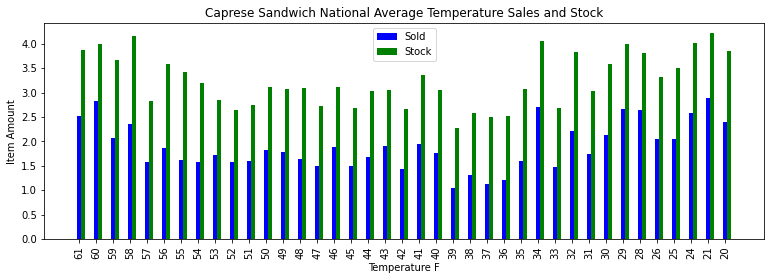

<Figure size 432x288 with 0 Axes>

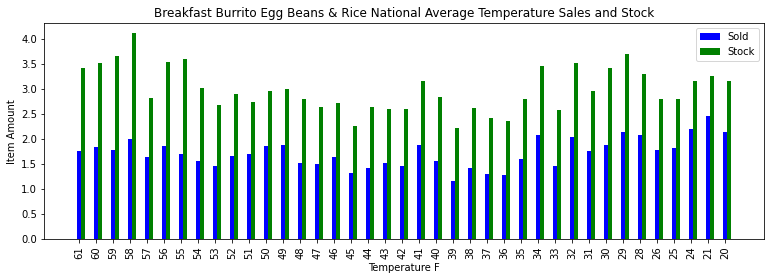

<Figure size 432x288 with 0 Axes>

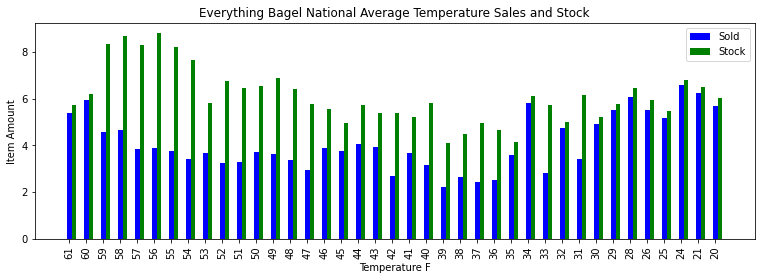

<Figure size 432x288 with 0 Axes>

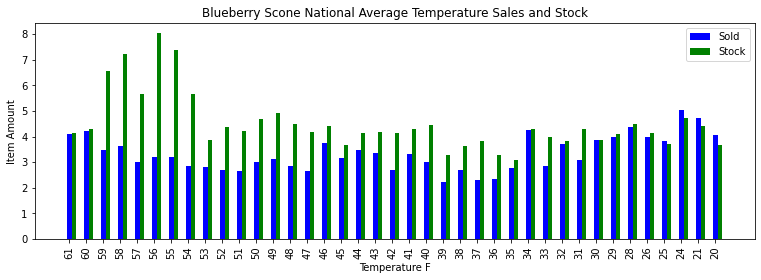

<Figure size 432x288 with 0 Axes>

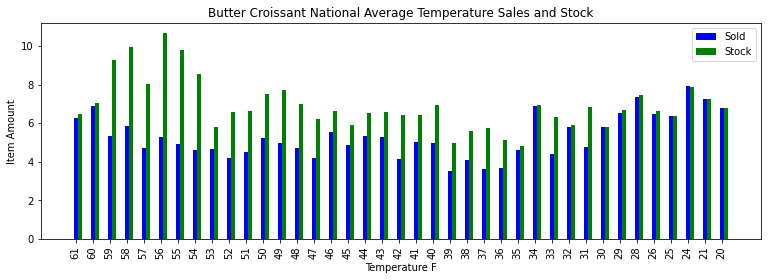

<Figure size 432x288 with 0 Axes>

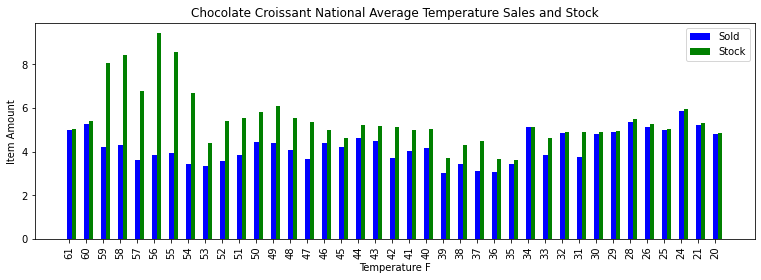

<Figure size 432x288 with 0 Axes>

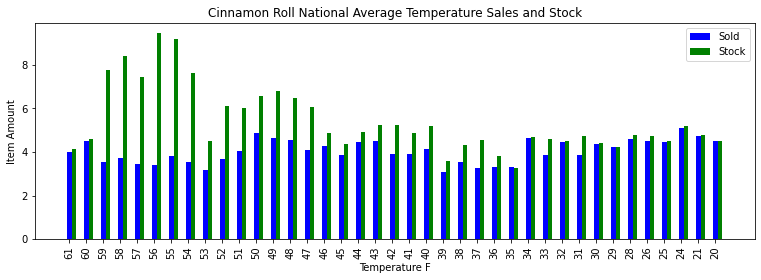

<Figure size 432x288 with 0 Axes>

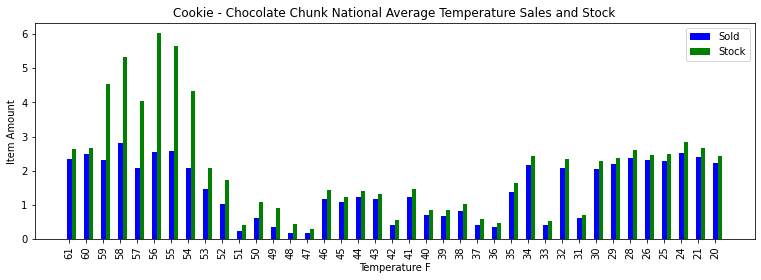

<Figure size 432x288 with 0 Axes>

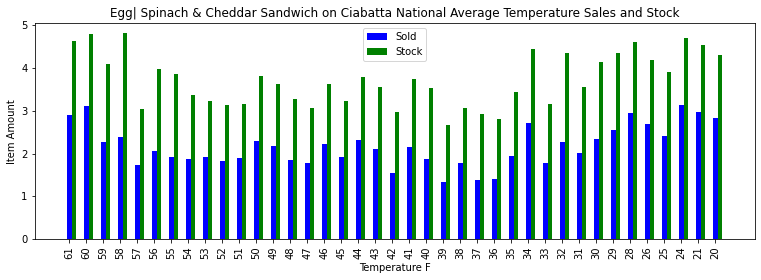

<Figure size 432x288 with 0 Axes>

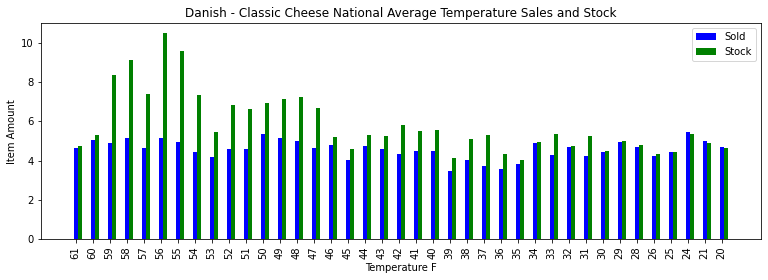

<Figure size 432x288 with 0 Axes>

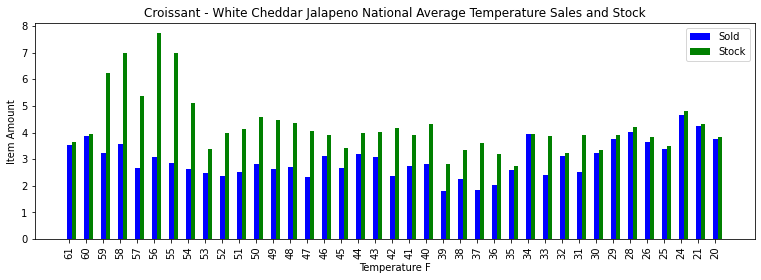

<Figure size 432x288 with 0 Axes>

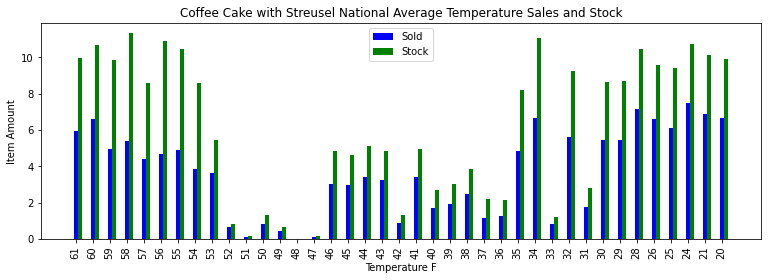

<Figure size 432x288 with 0 Axes>

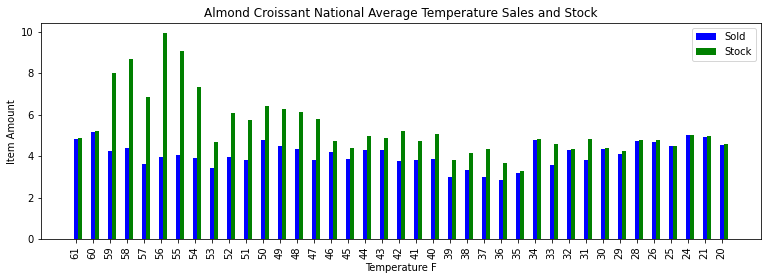

<Figure size 432x288 with 0 Axes>

In [ ]:
for j in tempuratureEffects:
  for n in range(len(j[1])-1, 0, -1):
    for i in range(n):
      if j[1][i] < j[1][i+1]:
        j[1][i], j[1][i + 1] = j[1][i + 1], j[1][i]
        j[2][i], j[2][i + 1] = j[2][i + 1], j[2][i]
        j[3][i], j[3][i + 1] = j[3][i + 1], j[3][i]


for item in tempuratureEffects:
  data = [item[2], item[3]]
  X = np.arange(len(item[1]))
  fig = plt.figure(figsize=(10, 3))

  ax = fig.add_axes([0,0,1,1])
  ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
  ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
  ax.legend(labels=['Sold', 'Stock'])
  axisTicks = ()
  for i in item[1]:
    titleDate = i
    axisTicks = axisTicks + (titleDate,)

  plt.xticks(X, (axisTicks))

  plt.title(item[0] +" National Average Temperature Sales and Stock")
  plt.xlabel('Temperature F')
  plt.ylabel('Item Amount')
  plt.xticks(fontsize='10' , rotation=90)

  fig = plt.figure()

We can see that most items are overstocked on days when there are higher temperatures 59-48 while they are under stocked on colder days with the sweeter items like the croissants, cookies and cinnamon rolls. Looking a the sandwhich and breakfast burritos they are idealy stocked during the average cold days.  

## 7.	Investigate the impact of weekday/weekends and National Holidays by adding extra features.

In [ ]:
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018-01-01', end='2022-12-31').to_pydatetime()

specialDayFeatures = []

for name in namesMainData:
  regularTotal = 0
  nonHolidayWeekendDailySales = 0
  holidayTotal = 0
  holidaySales = 0
  weekendTotal = 0
  weekendSales = 0
  for date in data_main.loc[data_main['Description'] == name]['BusinessDate'].unique():
    sdate = datetime(int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])) 
    thisMonth = str(sdate.month)
    thisDay = str(sdate.day)

    if(sdate.weekday() == 5 or sdate.weekday() == 6):
      weekendTotal += 1
      weekendSales += data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == date)]['SoldQuantity'].sum()
    elif(sdate in holidays):
    
      holidayTotal += 1
      holidaySales += data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == date)]['SoldQuantity'].sum()
    else:
      regularTotal += 1
      nonHolidayWeekendDailySales += data_main[(data_main['Description'] == name) & (data_main['BusinessDate'] == date)]['SoldQuantity'].sum()
  print(name)
  print("Weekend: ", weekendSales/weekendTotal)
  print("Non Holiday Weekday: ", nonHolidayWeekendDailySales/regularTotal)
  print("Holiday: ", holidaySales/holidayTotal)

  specialDayFeatures.append([name, nonHolidayWeekendDailySales/regularTotal, weekendSales/weekendTotal, holidaySales/holidayTotal])

Caprese Sandwich
Weekend:  228.32075471698113
Non Holiday Weekday:  288.0358565737052
Holiday:  235.7
Breakfast Burrito Egg Beans & Rice
Weekend:  189.23584905660377
Non Holiday Weekday:  225.88446215139442
Holiday:  185.2
Everything Bagel
Weekend:  584.4716981132076
Non Holiday Weekday:  641.5179282868526
Holiday:  582.7
Blueberry Scone
Weekend:  457.00943396226415
Non Holiday Weekday:  497.804780876494
Holiday:  428.1
Butter Croissant
Weekend:  722.3018867924528
Non Holiday Weekday:  789.9123505976096
Holiday:  690.0
Chocolate Croissant
Weekend:  600.6132075471698
Non Holiday Weekday:  602.3386454183267
Holiday:  564.2
Cinnamon Roll
Weekend:  513.0377358490566
Non Holiday Weekday:  517.4661354581673
Holiday:  473.6
Cookie - Chocolate Chunk
Weekend:  232.41509433962264
Non Holiday Weekday:  230.0597609561753
Holiday:  198.4
Egg| Spinach & Cheddar Sandwich on Ciabatta
Weekend:  276.64150943396226
Non Holiday Weekday:  317.73306772908364
Holiday:  263.3
Danish - Classic Cheese
Weekend: 

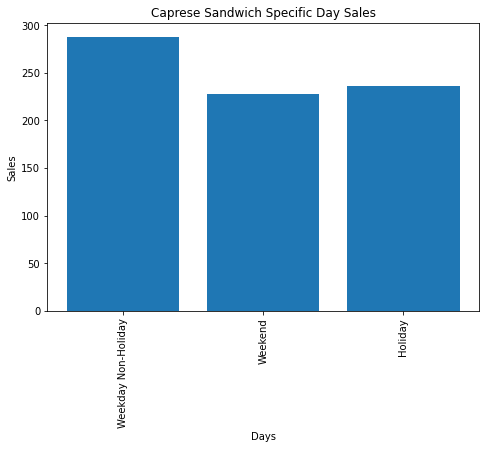

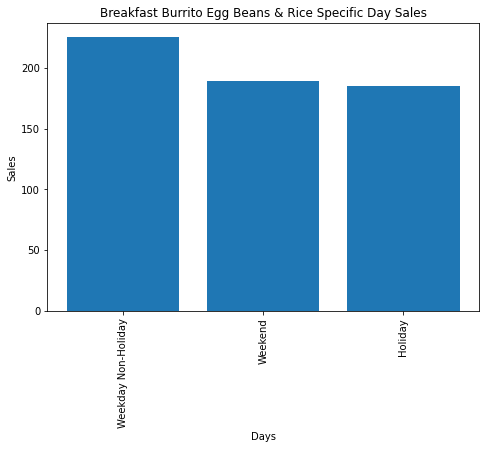

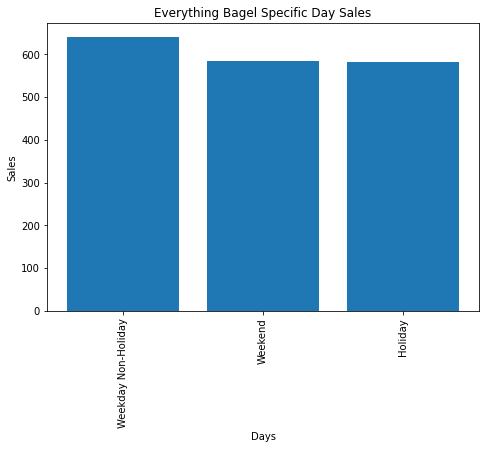

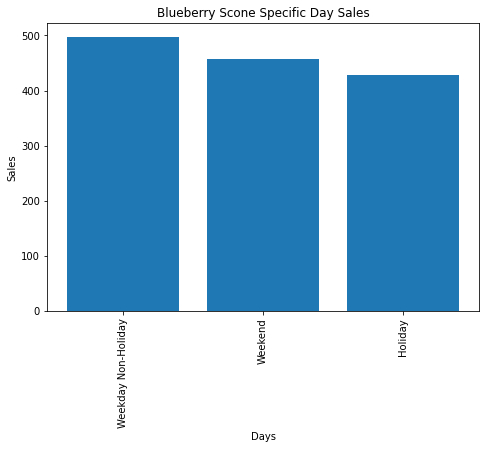

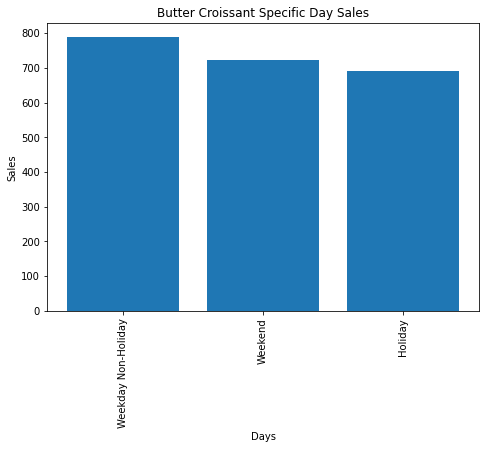

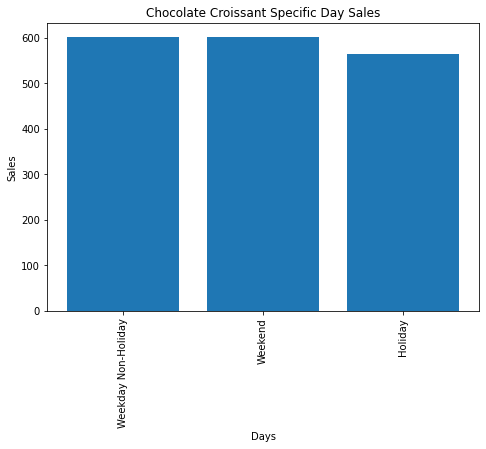

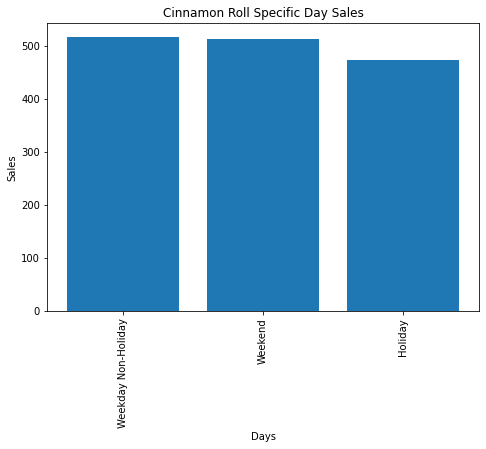

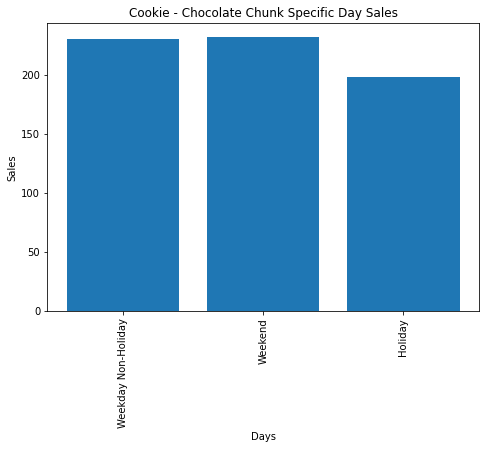

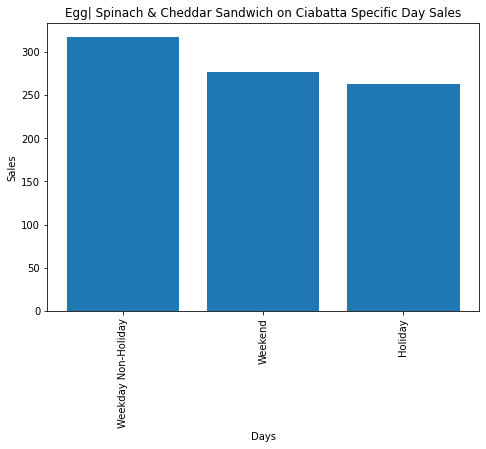

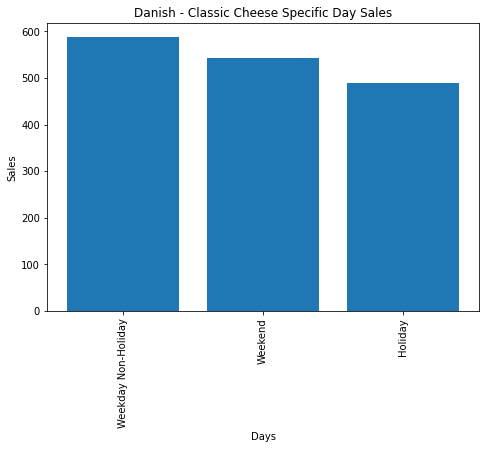

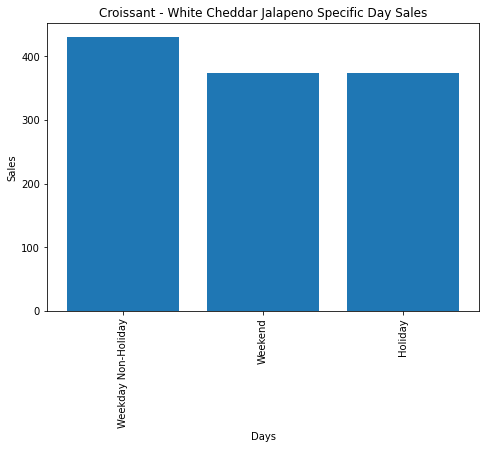

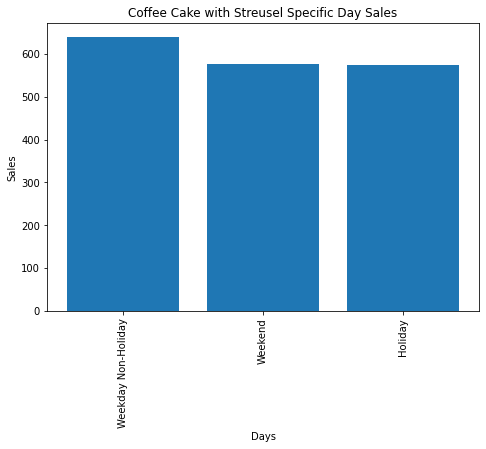

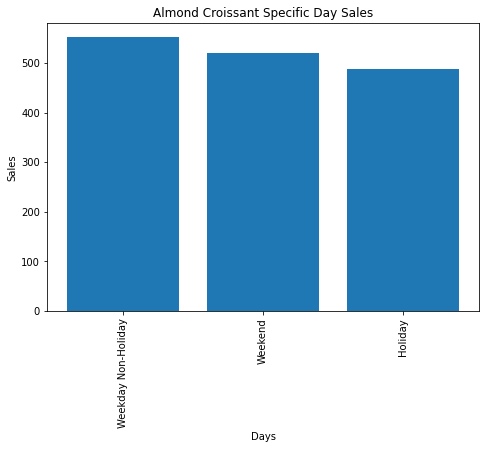

In [ ]:
#@title
for item in specialDayFeatures:

  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  sales = []
  products = ["Weekday Non-Holiday", "Weekend", "Holiday"]
  plt.title(item[0] +" Specific Day Sales")
  plt.xlabel('Days')
  plt.ylabel('Sales')
  sales.append(item[1])
  sales.append(item[2])
  sales.append(item[3])

  ax.bar(products,sales)
  plt.xticks(fontsize='10' , rotation=90)
  plt.show()


Looking at the data we can see that the chocolate and sweeter items sell beter on weekends such a chocolate chunk cookie, chocholate crosaint,and the cinamon roll. Looking back on section 5 we can see that the stores do bring in more of these products in stock on weekends. But on the natoinal holidays it would be expected to stock less of the Chocloate Chunk cookies because they have significatly less sales. With teh Egg Spinach Chedder Sandwic, breakfast burito and caprese they stock around the same for weekends as they do for weekday but have significantly less sales so limiting the sales on these days would also produce less waste.

## 8.	Based on the store data, identify the stocking patterns across multiple stores. Are they provided with new products every day or restocking happens less frequently based on your insights? 

In [ ]:
stores = data_main['StoreID'].unique()
frequency = []
for name in namesMainData:
  currentRestockStreak = []

  for store in stores:
    storeData = data_main[(data_main['Description'] == name) & (data_main['StoreID'] == store)]['LatestOrder']
    i = 0
    for data in storeData:
      if(data == 0):
        i += 1
      else:
        currentRestockStreak.append(i)
        i = 0
  count = []
  values = []
  for i in currentRestockStreak:
    if i in values:
      count[values.index(i)] += 1
    else:
      count.append(1)
      values.append(i)
  frequency.append([name, count, values])
for i in frequency:
  print(i[0])
  print("Days Since Last Order: ", i[1])
  print("Frequencry           : ", i[2])

Caprese Sandwich
Days Since Last Order:  [30841, 3835, 873, 301, 114, 33, 65, 12, 20, 2, 6, 6, 6, 5, 2, 2, 2, 1, 1, 1, 1]
Frequencry           :  [0, 1, 2, 3, 4, 6, 5, 8, 7, 13, 11, 12, 9, 10, 21, 15, 14, 40, 20, 29, 48]
Breakfast Burrito Egg Beans & Rice
Days Since Last Order:  [26789, 4748, 1291, 420, 77, 141, 2, 8, 7, 23, 43, 20, 6, 2, 1, 5, 1, 1, 1, 1, 1, 1]
Frequencry           :  [0, 1, 2, 3, 5, 4, 16, 11, 9, 7, 6, 8, 10, 19, 42, 12, 15, 22, 24, 25, 20, 80]
Everything Bagel
Days Since Last Order:  [39910, 1508, 244, 66, 3, 34, 12, 1, 2, 9, 1, 1, 3, 2, 1, 1]
Frequencry           :  [0, 1, 2, 3, 12, 4, 5, 13, 9, 6, 37, 17, 8, 10, 7, 11]
Blueberry Scone
Days Since Last Order:  [39265, 1756, 68, 301, 1, 26, 3, 11, 4, 8, 1, 2, 3, 1]
Frequencry           :  [0, 1, 3, 2, 12, 4, 10, 5, 8, 6, 15, 9, 7, 11]
Butter Croissant
Days Since Last Order:  [41544, 1005, 34, 161, 3, 15, 2, 4, 1, 1, 7, 3, 1]
Frequencry           :  [0, 1, 3, 2, 12, 4, 8, 6, 10, 7, 5, 9, 11]
Chocolate Croissant
Days S

## 9.	Draw conclusions and suggest a recommendation to optimize the stocking. We will have a deeper dive into it in section 3.

With the data presented over the entire United States data we can see a few overstocked item trends that appear. Most notablable items are overstocked during the days when there is a hotter average national temperature and understocked during the colder days for certain items like the Everhting Bagel, Blueberry scone, croissants, cinnamon roll, dannish and cookie. While the more meal items like the sandwiches and breakfeast burrito are stocked well for the colder temperatures. With the specific day sales we can see that the Croissants, Dannish, Cinamon roll and blueberry scones are over ordered on Monday which may lead to them being worst selling, even though the classic croiastant it the top selling item after loss revenue is added. By looking at the chocolate cookie, which is the least proifable item it can be improved by stocking less during hot days and more during cold days since it is clear that it is overstocked during the hot days but many people order them during the cold days but is unable to purchase, it is the 2nd most lost sales item with 74587.04 in lost sales. 